In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

In [2]:
path = os.listdir("/content/drive/MyDrive/Resimler/CT-Scan Images/")
classses = {"Kanserli" : 0, "Kansersiz" : 1}

In [3]:
import cv2
x = []
y = []
for cls in classses:
  pth = "/content/drive/MyDrive/Resimler/CT-Scan Images/"+cls
  #print(classses[cls])
  for j in os.listdir(pth):
    #print(j)
    img = cv2.imread(pth+"/"+j,0)
    img = cv2.resize(img,(200,200))
    x.append(img)
    y.append(classses[cls])

In [4]:
x = np.array(x)
y = np.array(y)

In [5]:
print(x.shape)
print(y.shape)

(364, 200, 200)
(364,)


In [6]:
#0:Kanserli, 1:Kanser Olmayan 
pd.Series(y).value_counts()

0    238
1    126
dtype: int64

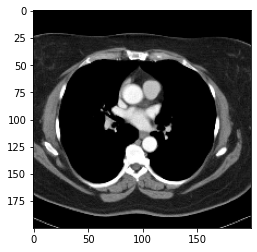

In [7]:
index = 65
plt.imshow(x[index], cmap="gray")

In [8]:
x_updated = x.reshape(len(x), -1)
x_updated.shape

(364, 40000)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_updated, y, random_state=42, test_size=0.2)

In [10]:
x_train.shape, x_test.shape

((291, 40000), (73, 40000))

NORMALİZASYON

In [11]:
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())
x_train=x_train/255
x_test=x_test/255
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [12]:
from sklearn.svm import SVC
gam = 0.1
c1 =1000
model=SVC(kernel='rbf',C=c1, gamma=gam)

In [13]:
model.fit(x_train,y_train)

SVC(C=1000, gamma=0.1)

In [14]:
print("olasılık = ",model.score(x_train,y_train))
print("olasılık = ",model.score(x_test,y_test))

olasılık =  1.0
olasılık =  0.684931506849315


In [15]:
gam = 0.00001
while gam < 1:
  model=SVC(kernel='rbf',C=c1, gamma=gam)
  model.fit(x_train,y_train)
  print("test verisi için gamma = ",gam,"için olasılık = ",model.score(x_test,y_test)*100)
  #print("eğitim verisi için gamma = ",gam,"için olasılık = ",model.score(x_train,y_train)*100)
  gam = gam*10

test verisi için gamma =  1e-05 için olasılık =  100.0
test verisi için gamma =  0.0001 için olasılık =  100.0
test verisi için gamma =  0.001 için olasılık =  95.8904109589041
test verisi için gamma =  0.01 için olasılık =  68.4931506849315
test verisi için gamma =  0.1 için olasılık =  68.4931506849315


In [16]:
min_on_train=x_train.min(axis=0)
range_on_training=(x_train-min_on_train).max(axis=0)
x_train_scaled=(x_train-min_on_train)/range_on_training
x_test_scaled=(x_test-min_on_train)/range_on_training

In [17]:
gam = 0.00001
while gam < 1:
  model=SVC(kernel='rbf',C=c1, gamma=gam)
  model.fit(x_train_scaled,y_train)
  print("test verisi için gamma = ",gam,"için olasılık = ",model.score(x_test_scaled,y_test)*100)
  #print("eğitim verisi için gamma = ",gam,"için olasılık = ",model.score(x_train_scaled,y_train)*100)
  gam = gam*10

test verisi için gamma =  1e-05 için olasılık =  100.0
test verisi için gamma =  0.0001 için olasılık =  100.0
test verisi için gamma =  0.001 için olasılık =  100.0
test verisi için gamma =  0.01 için olasılık =  68.4931506849315
test verisi için gamma =  0.1 için olasılık =  68.4931506849315


In [18]:
import pickle
mymodel = pickle.load(open('/content/drive/MyDrive/modeller/medel.pickle','rb'))

In [19]:
index=5
yol1="/content/drive/MyDrive/Resimler/CT-Scan Images/testverileri/"
yol2=".jpg"
bosluk=" "
testyol= "%s%s%s"%(yol1,index,yol2)
print(testyol)
testimg = cv2.imread(testyol,0)
testimg = cv2.resize(testimg,(200,200))
testimg = np.array(testimg)
testimg_updated = testimg.reshape(1,40000)
testimg_updated = testimg_updated/255

/content/drive/MyDrive/Resimler/CT-Scan Images/testverileri/5.jpg


In [20]:
index=5
yol1="/content/drive/MyDrive/Resimler/CT-Scan Images/testverileri/"
yol2=".jpg"
bosluk=" "
testyol= "%s%s%s"%(yol1,index,yol2)
print(testyol)
testimg = cv2.imread(testyol,0)
testimg = cv2.resize(testimg,(200,200))
testimg = np.array(testimg)
testimg_updated = testimg.reshape(1,40000)
testimg_updated = testimg_updated/255

/content/drive/MyDrive/Resimler/CT-Scan Images/testverileri/5.jpg


In [21]:
tahmin = mymodel.predict(testimg_updated)
if tahmin==1:
  print('Kanserli Değil')
else:
   print('Kanserli')

Kanserli


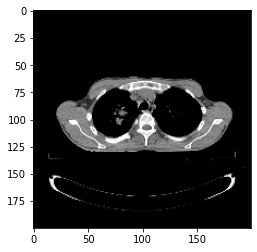

In [22]:
plt.imshow(testimg, cmap="gray")

SON

In [23]:
denemeyol = "/content/drive/MyDrive/Resimler/CT-Scan Images/Kanserli/Cancerous1.jpg"
denemeimg = cv2.imread(denemeyol,0)
denemeimg = cv2.resize(denemeimg,(200,200))
denemeimg.shape

(200, 200)

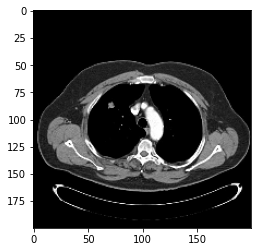

In [24]:
plt.imshow(denemeimg,cmap="gray")

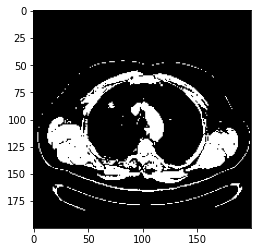

In [25]:
#output2 = cv2.GaussianBlur(denemeimg, (1, 5), 10)
(thresh, output2) = cv2.threshold(denemeimg, 100, 255, cv2.THRESH_BINARY)
plt.imshow(output2,cmap='gray')
plt.show()

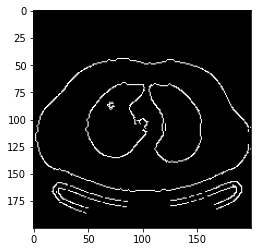

In [26]:
(thresh, output2) = cv2.threshold(denemeimg, 5, 255, cv2.THRESH_BINARY)
output2 = cv2.GaussianBlur(output2, (5, 5), 10)
output2a = cv2.Canny(output2, 250, 255)
plt.imshow(output2a,cmap='gray')
plt.show()